In [1]:
import pandas as pd
import geopandas as gpd

# ETL

In [2]:
dataPath = "./../Data/Manitoba/manitobaYieldData_2022.xlsx"

In [3]:
manitobaCropYield_df = pd.read_excel(dataPath)

In [12]:
manitobaCropYield_df

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds
...,...,...,...,...,...,...,...,...,...
61039,2022,YELLOWHEAD,BARLEY,F,Below,Minimum,Tolerance,NaN,NaN
61040,2022,YELLOWHEAD,FIELD PEAS,D,Below,Minimum,Tolerance,NaN,NaN
61041,2022,YELLOWHEAD,FLAX,B,Below,Minimum,Tolerance,NaN,NaN
61042,2022,YELLOWHEAD,FLAX,C,Below,Minimum,Tolerance,NaN,NaN


In [4]:
manitobaCropYield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  61044 non-null  int64 
 1   Risk Area / R.M.      61044 non-null  object
 2   Crop                  61044 non-null  object
 3   Soil                  61044 non-null  object
 4   Farms                 61044 non-null  object
 5   Acres                 61044 non-null  object
 6   Yield/acre(Metric)    61044 non-null  object
 7   Yield/acre(Metric).1  24887 non-null  object
 8   Yield/acre(Imperial)  24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.2+ MB


In [5]:
manitobaMunicipalities_gdf = gpd.read_file("./../Data/Manitoba/manitobaMunicipalities/MG_MUNICIPALITY_POLY.shp")

<Axes: >

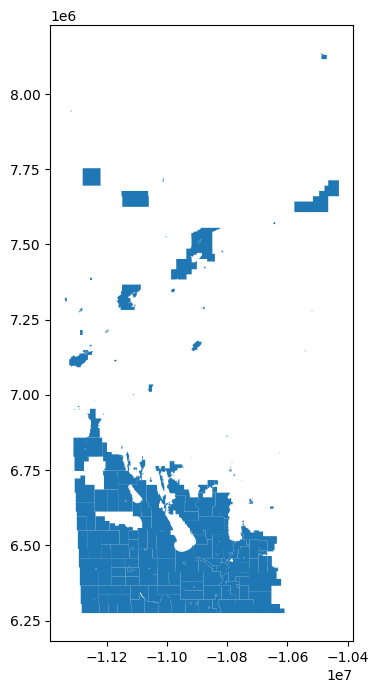

In [6]:
manitobaMunicipalities_gdf.plot(
    figsize = (10, 8)
)

## Data Standardizing

In [8]:
df_clean_1 = manitobaCropYield_df.rename(columns={'Risk Area / R.M.': 'RM', 'Yield/acre(Imperial)': 'Yield'})\
    .drop(columns=['Yield/acre(Metric)', 'Yield/acre(Metric).1'])

In [9]:
df_clean_2=df_clean_1.sort_values(['RM', 'Year', 'Crop'])

In [10]:
df_clean_2

,Year,RM,Crop,Soil,Farms,Acres,Yield
21394,2000,ALEXANDER,ARGENTINE CANOLA,F,12,"2,401.0",24.1 Bushels
21661,2000,ALEXANDER,ARGENTINE CANOLA,E,10,"1,509.0",23.3 Bushels
22851,2000,ALEXANDER,ARGENTINE CANOLA,G,10,930,19.0 Bushels
23794,2000,ALEXANDER,ARGENTINE CANOLA,H,5,"1,464.0",13.5 Bushels
24887,2000,ALEXANDER,ARGENTINE CANOLA,D,Below,Minimum,NaN
...,...,...,...,...,...,...,...
61041,2022,YELLOWHEAD,FLAX,B,Below,Minimum,NaN
61042,2022,YELLOWHEAD,FLAX,C,Below,Minimum,NaN
587,2022,YELLOWHEAD,OATS,C,10,"2,976.0",130.0 Bushels
629,2022,YELLOWHEAD,OATS,B,10,"1,889.0",128.3 Bushels


In [11]:
df_clean_2.pivot_table(index=['Year', 'RM', 'Soil', 'Farms','Acres'], columns='Crop',values='Yield' )

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
year - rm - 11 crop names - soil - farms- acres - yield

# EDA